# Cross-validation lung data
Does five-fold crossvalidation in annotating lung data to get stability of different algorithms

In [14]:
import os, sys

import popv
import anndata
import numpy as np
import scanpy as sc
from scanpy.plotting import palettes
import sys
sys.path.insert(-1, '..')
import _utils

## Run PopV

In [15]:
thymus_fn = '../thymus_cv/data/Thymus_TS.h5ad'
thymus = sc.read_h5ad(thymus_fn)

In [16]:
query_index = np.random.choice([0,1,2,3,4], size = len(thymus), replace=True)

In [17]:
if not os.path.exists('data'):
    os.mkdir('data')

In [18]:
for i in range(0,5):
    ref_adata_path = "data/ref_{}.h5ad".format(i)
    query_adata_path = "data/query_{}.h5ad".format(i)
    thymus[query_index!=i].write(ref_adata_path)
    thymus[query_index==i].write(query_adata_path)

In [19]:
save_folder = 'popv_results'
query_batch_key = 'donor_assay'

# Lesser used parameters
query_labels_key=None
unknown_celltype_label='unknown'

# Following parameters are specific to Tabula Sapiens dataset
ref_labels_key='cell_ontology_class'
ref_batch_key = 'donor_assay'

In [20]:
from popv.preprocessing import Process_Query
from popv.annotation import annotate_data

In [21]:
for i in range(0,5):
    print(i)
    save_folder = f'cv_run_{i}/popv_results_{i}'
    if not os.path.exists(f'cv_run_{i}'):
        os.mkdir(f'cv_run_{i}')
    
    ref_adata_path = "data/ref_{}.h5ad".format(i)
    query_adata_path = "data/query_{}.h5ad".format(i)
    
    # read in the reference dataset
    ref_adata = anndata.read(ref_adata_path)
    query_adata = anndata.read(query_adata_path)
    
    min_celltype_size = np.min(ref_adata.obs.groupby('cell_ontology_class').size())
    n_samples_per_label = np.max((min_celltype_size, 100))
    
    adata = Process_Query(
        query_adata,
        ref_adata,
        query_labels_key=query_labels_key,
        query_batch_key=query_batch_key,
        ref_labels_key=ref_labels_key,
        ref_batch_key=ref_batch_key,
        unknown_celltype_label=unknown_celltype_label,
        save_path_trained_models=f'cv_run_{i}/pretrained_models/',
        cl_obo_folder='../PopV/ontology/',
        pretrained_scvi_path=None,
        prediction_mode='retrain',
        n_samples_per_label=n_samples_per_label,
        use_gpu=True,
        compute_embedding=True,
        hvg=4000
    ).adata
    
    annotate_data(adata, save_path=save_folder)
    adata.write(f'cv_run_{i}/annotated_query.h5ad')

0


Sampling 100 per label
Saving celltypist results to adata.obs["popv_celltypist_prediction"]
🍳 Preparing data before training
✂️ 72 non-expressed genes are filtered out
⚖️ Scaling input data
🏋️ Training data using logistic regression
✅ Model training done!
🔬 Input data has 33661 cells and 4000 genes
🔗 Matching reference genes in the model
🧬 3928 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 15
🗳️ Majority voting the predictions
✅ Majority voting done!
Integrating data with bbknn
Saving knn on bbknn results to adata.obs["popv_knn_on_bbknn_prediction"]
Saving UMAP of bbknn results to adata.obs["X_bbknn_umap_popv"]
Integrating data with scanorama


Found 4000 genes among all datasets
[[0.         0.9882145  0.25056883 0.03707995 0.20582819 0.06294326
  0.027897   0.06015038]
 [0.         0.         0.5391868  0.02710666 0.52032999 0.05774897
  0.01502146 0.03759398]
 [0.         0.         0.         0.98918501 0.10605568 0.03501773
  0.14377682 0.12781955]
 [0.         0.         0.         0.         0.22904596 0.0382387
  0.10085837 0.09022556]
 [0.         0.         0.         0.         0.         0.99024823
  0.38841202 0.32330827]
 [0.         0.         0.         0.         0.         0.
  0.70815451 0.29323308]
 [0.         0.         0.         0.         0.         0.
  0.         0.98496241]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]
Processing datasets (4, 5)
Processing datasets (2, 3)
Processing datasets (0, 1)
Processing datasets (6, 7)
Processing datasets (5, 6)
Processing datasets (1, 2)
Processing datasets (1, 4)
Processing datasets (4, 6)
Processing datasets (4, 7)
P

Saving knn on scanorama results to adata.obs["popv_knn_on_scanorama_prediction"]
Saving UMAP of scanorama results to adata.obs["X_umap_scanorma_popv"]
Integrating data with scvi
Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
Unable to initialize backend 'plugin': xla_extension has no attributes named get_plugin_device_client. Compile TensorFlow with //tensorflow/compiler/xla/python:enable_plugin_device set to true (defaults to false) to enable this.
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
Training scvi offline.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores


Epoch 119/119: 100%|██████████| 119/119 [07:02<00:00,  3.58s/it, loss=1.29e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=119` reached.


Epoch 119/119: 100%|██████████| 119/119 [07:02<00:00,  3.55s/it, loss=1.29e+03, v_num=1]


Saving knn on scvi results to adata.obs["popv_knn_on_scvi_prediction"]
Saving UMAP of scvi results to adata.obs["X_scvi_umap_popv"]
Computing Onclass. Storing prediction in adata.obs["popv_onclass_prediction"]


Training cost after epoch 1: loss:5.898054 acc: 0.943 auc: 1.000 auprc: 0.985
Training cost after epoch 2: loss:2.978493 acc: 0.985 auc: 1.000 auprc: 0.999
Training cost after epoch 3: loss:2.050752 acc: 0.995 auc: 1.000 auprc: 1.000
Training cost after epoch 4: loss:1.566059 acc: 0.997 auc: 1.000 auprc: 1.000
Training cost after epoch 5: loss:1.229318 acc: 0.999 auc: 1.000 auprc: 1.000
Training cost after epoch 6: loss:0.976279 acc: 0.999 auc: 1.000 auprc: 1.000
Training cost after epoch 7: loss:0.781722 acc: 1.000 auc: 1.000 auprc: 1.000
Training cost after epoch 8: loss:0.630230 acc: 0.999 auc: 1.000 auprc: 1.000
Training cost after epoch 9: loss:0.514280 acc: 0.999 auc: 1.000 auprc: 1.000
Training cost after epoch 10: loss:0.424763 acc: 0.999 auc: 1.000 auprc: 1.000
Training cost after epoch 11: loss:0.360314 acc: 1.000 auc: 1.000 auprc: 1.000
Training cost after epoch 12: loss:0.304794 acc: 1.000 auc: 1.000 auprc: 1.000
Training cost after epoch 13: loss:0.260641 acc: 1.000 auc: 1

Computing random forest classifier. Storing prediction in adata.obs["popv_rf_prediction"]
Integrating data with scANVI


INFO     File cv_run_0/pretrained_models//scvi/model.pt already downloaded                                         
INFO     Training for 20 epochs.                                                                                   


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 20/20: 100%|██████████| 20/20 [00:49<00:00,  2.36s/it, loss=1.41e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 20/20: 100%|██████████| 20/20 [00:49<00:00,  2.48s/it, loss=1.41e+03, v_num=1]

Saving scanvi label prediction to adata.obs["popv_scanvi_prediction"]


Saving UMAP of scanvi results to adata.obs["X_scanvi_umap_popv"]
Computing support vector machine. Storing prediction in adata.obs["popv_svm_prediction"]
Using predictions ['popv_celltypist_prediction', 'popv_knn_on_bbknn_prediction', 'popv_knn_on_scanorama_prediction', 'popv_knn_on_scvi_prediction', 'popv_onclass_prediction', 'popv_rf_prediction', 'popv_scanvi_prediction', 'popv_svm_prediction'] for PopV consensus
Predictions saved to cv_run_0/popv_results_0/predictions.csv
... storing '_batch_annotation' as categorical
... storing '_labels_annotation' as categorical
... storing 'popv_knn_on_bbknn_prediction' as categorical
... storing 'popv_knn_on_scanorama_prediction' as categorical
... storing 'popv_knn_on_scvi_prediction' as categorical
... storing '_labels_annotation_cell_ontology_id' as categorical
... storing 'popv_onclass_prediction' as categorical
... storing 'popv_onclass_seen' as categorical
... storing 'popv_rf_prediction' as categorical
... storing 'popv_scanvi_prediction

1


Sampling 100 per label
Saving celltypist results to adata.obs["popv_celltypist_prediction"]
🍳 Preparing data before training
✂️ 84 non-expressed genes are filtered out
⚖️ Scaling input data
🏋️ Training data using logistic regression
✅ Model training done!
🔬 Input data has 33661 cells and 4000 genes
🔗 Matching reference genes in the model
🧬 3916 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 15
🗳️ Majority voting the predictions
✅ Majority voting done!
Integrating data with bbknn
Saving knn on bbknn results to adata.obs["popv_knn_on_bbknn_prediction"]
Saving UMAP of bbknn results to adata.obs["X_bbknn_umap_popv"]
Integrating data with scanorama


Found 4000 genes among all datasets
[[0.         0.98925339 0.2549921  0.03208985 0.21017723 0.05196507
  0.0308642  0.0619469 ]
 [0.         0.         0.50904977 0.0260181  0.53733032 0.05033937
  0.01851852 0.01769912]
 [0.         0.         0.         0.9895708  0.10231597 0.02751092
  0.11728395 0.08849558]
 [0.         0.         0.         0.         0.22623345 0.03088648
  0.09670782 0.09734513]
 [0.         0.         0.         0.         0.         0.98427948
  0.38477366 0.34513274]
 [0.         0.         0.         0.         0.         0.
  0.72633745 0.28318584]
 [0.         0.         0.         0.         0.         0.
  0.         0.98230088]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]
Processing datasets (2, 3)
Processing datasets (0, 1)
Processing datasets (4, 5)
Processing datasets (6, 7)
Processing datasets (5, 6)
Processing datasets (1, 4)
Processing datasets (1, 2)
Processing datasets (4, 6)
Processing datasets (4, 7)


Saving knn on scanorama results to adata.obs["popv_knn_on_scanorama_prediction"]
Saving UMAP of scanorama results to adata.obs["X_umap_scanorma_popv"]
Integrating data with scvi
Training scvi offline.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 119/119: 100%|██████████| 119/119 [02:24<00:00,  1.19s/it, loss=1.31e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=119` reached.


Epoch 119/119: 100%|██████████| 119/119 [02:24<00:00,  1.21s/it, loss=1.31e+03, v_num=1]


Saving knn on scvi results to adata.obs["popv_knn_on_scvi_prediction"]
Saving UMAP of scvi results to adata.obs["X_scvi_umap_popv"]
Computing Onclass. Storing prediction in adata.obs["popv_onclass_prediction"]


Training cost after epoch 1: loss:5.921597 acc: 0.943 auc: 1.000 auprc: 0.988
Training cost after epoch 2: loss:3.001516 acc: 0.983 auc: 1.000 auprc: 0.999
Training cost after epoch 3: loss:2.071282 acc: 0.993 auc: 1.000 auprc: 1.000
Training cost after epoch 4: loss:1.584557 acc: 0.999 auc: 1.000 auprc: 1.000
Training cost after epoch 5: loss:1.244737 acc: 0.999 auc: 1.000 auprc: 1.000
Training cost after epoch 6: loss:0.988228 acc: 0.998 auc: 1.000 auprc: 1.000
Training cost after epoch 7: loss:0.790144 acc: 1.000 auc: 1.000 auprc: 1.000
Training cost after epoch 8: loss:0.637042 acc: 1.000 auc: 1.000 auprc: 1.000
Training cost after epoch 9: loss:0.518111 acc: 0.999 auc: 1.000 auprc: 1.000
Training cost after epoch 10: loss:0.424627 acc: 1.000 auc: 1.000 auprc: 1.000
Training cost after epoch 11: loss:0.355389 acc: 0.998 auc: 1.000 auprc: 1.000
Training cost after epoch 12: loss:0.307032 acc: 1.000 auc: 1.000 auprc: 1.000
Training cost after epoch 13: loss:0.264061 acc: 0.999 auc: 1

Computing random forest classifier. Storing prediction in adata.obs["popv_rf_prediction"]
Integrating data with scANVI


INFO     File cv_run_1/pretrained_models//scvi/model.pt already downloaded                                         
INFO     Training for 20 epochs.                                                                                   


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 20/20: 100%|██████████| 20/20 [00:20<00:00,  1.01s/it, loss=1.42e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 20/20: 100%|██████████| 20/20 [00:20<00:00,  1.01s/it, loss=1.42e+03, v_num=1]

Saving scanvi label prediction to adata.obs["popv_scanvi_prediction"]


Saving UMAP of scanvi results to adata.obs["X_scanvi_umap_popv"]
Computing support vector machine. Storing prediction in adata.obs["popv_svm_prediction"]
Using predictions ['popv_celltypist_prediction', 'popv_knn_on_bbknn_prediction', 'popv_knn_on_scanorama_prediction', 'popv_knn_on_scvi_prediction', 'popv_onclass_prediction', 'popv_rf_prediction', 'popv_scanvi_prediction', 'popv_svm_prediction'] for PopV consensus
Predictions saved to cv_run_1/popv_results_1/predictions.csv
... storing '_batch_annotation' as categorical
... storing '_labels_annotation' as categorical
... storing 'popv_knn_on_bbknn_prediction' as categorical
... storing 'popv_knn_on_scanorama_prediction' as categorical
... storing 'popv_knn_on_scvi_prediction' as categorical
... storing '_labels_annotation_cell_ontology_id' as categorical
... storing 'popv_onclass_prediction' as categorical
... storing 'popv_onclass_seen' as categorical
... storing 'popv_rf_prediction' as categorical
... storing 'popv_scanvi_prediction

2


Sampling 100 per label
Saving celltypist results to adata.obs["popv_celltypist_prediction"]
🍳 Preparing data before training
✂️ 95 non-expressed genes are filtered out
⚖️ Scaling input data
🏋️ Training data using logistic regression
✅ Model training done!
🔬 Input data has 33661 cells and 4000 genes
🔗 Matching reference genes in the model
🧬 3905 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 15
🗳️ Majority voting the predictions
✅ Majority voting done!
Integrating data with bbknn
Saving knn on bbknn results to adata.obs["popv_knn_on_bbknn_prediction"]
Saving UMAP of bbknn results to adata.obs["X_bbknn_umap_popv"]
Integrating data with scanorama


Found 4000 genes among all datasets
[[0.         0.98788229 0.26315037 0.03506744 0.20868529 0.05725699
  0.0385439  0.03030303]
 [0.         0.         0.53375649 0.0288517  0.52394691 0.03923832
  0.01284797 0.        ]
 [0.         0.         0.         0.99537572 0.11435997 0.03106968
  0.124197   0.08333333]
 [0.         0.         0.         0.         0.22620424 0.03969171
  0.09850107 0.08333333]
 [0.         0.         0.         0.         0.         0.98801598
  0.40899358 0.35606061]
 [0.         0.         0.         0.         0.         0.
  0.68736617 0.34848485]
 [0.         0.         0.         0.         0.         0.
  0.         0.98484848]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]
Processing datasets (2, 3)
Processing datasets (4, 5)
Processing datasets (0, 1)
Processing datasets (6, 7)
Processing datasets (5, 6)
Processing datasets (1, 2)
Processing datasets (1, 4)
Processing datasets (4, 6)
Processing datasets (4, 7)


Saving knn on scanorama results to adata.obs["popv_knn_on_scanorama_prediction"]
Saving UMAP of scanorama results to adata.obs["X_umap_scanorma_popv"]
Integrating data with scvi
Training scvi offline.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 119/119: 100%|██████████| 119/119 [06:09<00:00,  2.73s/it, loss=1.29e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=119` reached.


Epoch 119/119: 100%|██████████| 119/119 [06:09<00:00,  3.11s/it, loss=1.29e+03, v_num=1]


Saving knn on scvi results to adata.obs["popv_knn_on_scvi_prediction"]
Saving UMAP of scvi results to adata.obs["X_scvi_umap_popv"]
Computing Onclass. Storing prediction in adata.obs["popv_onclass_prediction"]


Training cost after epoch 1: loss:5.918844 acc: 0.946 auc: 1.000 auprc: 0.987
Training cost after epoch 2: loss:2.989125 acc: 0.983 auc: 1.000 auprc: 0.999
Training cost after epoch 3: loss:2.062068 acc: 0.994 auc: 1.000 auprc: 1.000
Training cost after epoch 4: loss:1.577051 acc: 0.997 auc: 1.000 auprc: 1.000
Training cost after epoch 5: loss:1.240854 acc: 0.998 auc: 1.000 auprc: 1.000
Training cost after epoch 6: loss:0.987010 acc: 0.999 auc: 1.000 auprc: 1.000
Training cost after epoch 7: loss:0.790011 acc: 1.000 auc: 1.000 auprc: 1.000
Training cost after epoch 8: loss:0.637220 acc: 0.999 auc: 1.000 auprc: 1.000
Training cost after epoch 9: loss:0.520019 acc: 0.997 auc: 1.000 auprc: 1.000
Training cost after epoch 10: loss:0.428942 acc: 1.000 auc: 1.000 auprc: 1.000
Training cost after epoch 11: loss:0.357347 acc: 0.999 auc: 1.000 auprc: 1.000
Training cost after epoch 12: loss:0.306466 acc: 0.998 auc: 1.000 auprc: 1.000
Training cost after epoch 13: loss:0.267601 acc: 0.999 auc: 1

Computing random forest classifier. Storing prediction in adata.obs["popv_rf_prediction"]
Integrating data with scANVI


INFO     File cv_run_2/pretrained_models//scvi/model.pt already downloaded                                         
INFO     Training for 20 epochs.                                                                                   


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 20/20: 100%|██████████| 20/20 [00:21<00:00,  1.07s/it, loss=1.44e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 20/20: 100%|██████████| 20/20 [00:21<00:00,  1.06s/it, loss=1.44e+03, v_num=1]

Saving scanvi label prediction to adata.obs["popv_scanvi_prediction"]


Saving UMAP of scanvi results to adata.obs["X_scanvi_umap_popv"]
Computing support vector machine. Storing prediction in adata.obs["popv_svm_prediction"]
Using predictions ['popv_celltypist_prediction', 'popv_knn_on_bbknn_prediction', 'popv_knn_on_scanorama_prediction', 'popv_knn_on_scvi_prediction', 'popv_onclass_prediction', 'popv_rf_prediction', 'popv_scanvi_prediction', 'popv_svm_prediction'] for PopV consensus
Predictions saved to cv_run_2/popv_results_2/predictions.csv
... storing 'free_annotation' as categorical
... storing 'cell_type_ontology_term_id' as categorical
... storing 'cell_type' as categorical
... storing 'cell_ontology_class_tissue' as categorical
... storing '_batch_annotation' as categorical
... storing '_labels_annotation' as categorical
... storing 'popv_knn_on_bbknn_prediction' as categorical
... storing 'popv_knn_on_scanorama_prediction' as categorical
... storing 'popv_knn_on_scvi_prediction' as categorical
... storing '_labels_annotation_cell_ontology_id' as

3


Sampling 100 per label
Saving celltypist results to adata.obs["popv_celltypist_prediction"]
🍳 Preparing data before training
✂️ 94 non-expressed genes are filtered out
⚖️ Scaling input data
🏋️ Training data using logistic regression
✅ Model training done!
🔬 Input data has 33661 cells and 4000 genes
🔗 Matching reference genes in the model
🧬 3906 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 15
🗳️ Majority voting the predictions
✅ Majority voting done!
Integrating data with bbknn
Saving knn on bbknn results to adata.obs["popv_knn_on_bbknn_prediction"]
Saving UMAP of bbknn results to adata.obs["X_bbknn_umap_popv"]
Integrating data with scanorama


Found 4000 genes among all datasets
[[0.         0.98993289 0.24967584 0.0346287  0.20032662 0.0447437
  0.04048583 0.03809524]
 [0.         0.         0.52516779 0.0212528  0.49217002 0.05369128
  0.04048583 0.03809524]
 [0.         0.         0.         0.9926895  0.10462711 0.02953953
  0.10526316 0.05714286]
 [0.         0.         0.         0.         0.2173913  0.03193536
  0.09716599 0.04761905]
 [0.         0.         0.         0.         0.         0.98305821
  0.32995951 0.2952381 ]
 [0.         0.         0.         0.         0.         0.
  0.68825911 0.25714286]
 [0.         0.         0.         0.         0.         0.
  0.         1.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]
Processing datasets (6, 7)
Processing datasets (2, 3)
Processing datasets (0, 1)
Processing datasets (4, 5)
Processing datasets (5, 6)
Processing datasets (1, 2)
Processing datasets (1, 4)
Processing datasets (4, 6)
Processing datasets (4, 7)
P

Saving knn on scanorama results to adata.obs["popv_knn_on_scanorama_prediction"]
Saving UMAP of scanorama results to adata.obs["X_umap_scanorma_popv"]
Integrating data with scvi
Training scvi offline.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 119/119: 100%|██████████| 119/119 [03:06<00:00,  3.72s/it, loss=1.29e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=119` reached.


Epoch 119/119: 100%|██████████| 119/119 [03:06<00:00,  1.57s/it, loss=1.29e+03, v_num=1]


Saving knn on scvi results to adata.obs["popv_knn_on_scvi_prediction"]
Saving UMAP of scvi results to adata.obs["X_scvi_umap_popv"]
Computing Onclass. Storing prediction in adata.obs["popv_onclass_prediction"]


Training cost after epoch 1: loss:5.895094 acc: 0.947 auc: 1.000 auprc: 0.985
Training cost after epoch 2: loss:2.966690 acc: 0.977 auc: 1.000 auprc: 0.999
Training cost after epoch 3: loss:2.031045 acc: 0.995 auc: 1.000 auprc: 1.000
Training cost after epoch 4: loss:1.544617 acc: 0.998 auc: 1.000 auprc: 1.000
Training cost after epoch 5: loss:1.208651 acc: 0.999 auc: 1.000 auprc: 1.000
Training cost after epoch 6: loss:0.956872 acc: 0.999 auc: 1.000 auprc: 1.000
Training cost after epoch 7: loss:0.765683 acc: 0.999 auc: 1.000 auprc: 1.000
Training cost after epoch 8: loss:0.616109 acc: 1.000 auc: 1.000 auprc: 1.000
Training cost after epoch 9: loss:0.501243 acc: 1.000 auc: 1.000 auprc: 1.000
Training cost after epoch 10: loss:0.414033 acc: 1.000 auc: 1.000 auprc: 1.000
Training cost after epoch 11: loss:0.348401 acc: 0.999 auc: 1.000 auprc: 1.000
Training cost after epoch 12: loss:0.298907 acc: 0.999 auc: 1.000 auprc: 1.000
Training cost after epoch 13: loss:0.262839 acc: 0.999 auc: 1

Computing random forest classifier. Storing prediction in adata.obs["popv_rf_prediction"]
Integrating data with scANVI


INFO     File cv_run_3/pretrained_models//scvi/model.pt already downloaded                                         
INFO     Training for 20 epochs.                                                                                   


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 20/20: 100%|██████████| 20/20 [00:18<00:00,  1.07it/s, loss=1.41e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 20/20: 100%|██████████| 20/20 [00:18<00:00,  1.05it/s, loss=1.41e+03, v_num=1]

Saving scanvi label prediction to adata.obs["popv_scanvi_prediction"]


Saving UMAP of scanvi results to adata.obs["X_scanvi_umap_popv"]
Computing support vector machine. Storing prediction in adata.obs["popv_svm_prediction"]
Using predictions ['popv_celltypist_prediction', 'popv_knn_on_bbknn_prediction', 'popv_knn_on_scanorama_prediction', 'popv_knn_on_scvi_prediction', 'popv_onclass_prediction', 'popv_rf_prediction', 'popv_scanvi_prediction', 'popv_svm_prediction'] for PopV consensus
Predictions saved to cv_run_3/popv_results_3/predictions.csv
... storing 'free_annotation' as categorical
... storing '_batch_annotation' as categorical
... storing '_labels_annotation' as categorical
... storing 'popv_knn_on_bbknn_prediction' as categorical
... storing 'popv_knn_on_scanorama_prediction' as categorical
... storing 'popv_knn_on_scvi_prediction' as categorical
... storing '_labels_annotation_cell_ontology_id' as categorical
... storing 'popv_onclass_prediction' as categorical
... storing 'popv_onclass_seen' as categorical
... storing 'popv_rf_prediction' as ca

4


Sampling 100 per label
Saving celltypist results to adata.obs["popv_celltypist_prediction"]
🍳 Preparing data before training
✂️ 87 non-expressed genes are filtered out
⚖️ Scaling input data
🏋️ Training data using logistic regression
✅ Model training done!
🔬 Input data has 33661 cells and 4000 genes
🔗 Matching reference genes in the model
🧬 3913 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 15
🗳️ Majority voting the predictions
✅ Majority voting done!
Integrating data with bbknn
Saving knn on bbknn results to adata.obs["popv_knn_on_bbknn_prediction"]
Saving UMAP of bbknn results to adata.obs["X_bbknn_umap_popv"]
Integrating data with scanorama


Found 4000 genes among all datasets
[[0.         0.99139415 0.26095047 0.03463035 0.21525107 0.0511316
  0.05175983 0.02586207]
 [0.         0.         0.5404475  0.01549053 0.52610442 0.05909352
  0.01449275 0.00862069]
 [0.         0.         0.         0.99105058 0.11800901 0.03394803
  0.13250518 0.11206897]
 [0.         0.         0.         0.         0.22373541 0.04085603
  0.11801242 0.09482759]
 [0.         0.         0.         0.         0.         0.98700754
  0.36231884 0.3362069 ]
 [0.         0.         0.         0.         0.         0.
  0.70600414 0.3362069 ]
 [0.         0.         0.         0.         0.         0.
  0.         0.99137931]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]
Processing datasets (0, 1)
Processing datasets (6, 7)
Processing datasets (2, 3)
Processing datasets (4, 5)
Processing datasets (5, 6)
Processing datasets (1, 2)
Processing datasets (1, 4)
Processing datasets (4, 6)
Processing datasets (5, 7)
P

Saving knn on scanorama results to adata.obs["popv_knn_on_scanorama_prediction"]
Saving UMAP of scanorama results to adata.obs["X_umap_scanorma_popv"]
Integrating data with scvi
Training scvi offline.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 119/119: 100%|██████████| 119/119 [02:22<00:00,  1.22s/it, loss=1.28e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=119` reached.


Epoch 119/119: 100%|██████████| 119/119 [02:22<00:00,  1.19s/it, loss=1.28e+03, v_num=1]


Saving knn on scvi results to adata.obs["popv_knn_on_scvi_prediction"]
Saving UMAP of scvi results to adata.obs["X_scvi_umap_popv"]
Computing Onclass. Storing prediction in adata.obs["popv_onclass_prediction"]


Training cost after epoch 1: loss:5.880961 acc: 0.952 auc: 1.000 auprc: 0.988
Training cost after epoch 2: loss:2.967667 acc: 0.985 auc: 1.000 auprc: 0.999
Training cost after epoch 3: loss:2.039431 acc: 0.995 auc: 1.000 auprc: 1.000
Training cost after epoch 4: loss:1.555241 acc: 0.998 auc: 1.000 auprc: 1.000
Training cost after epoch 5: loss:1.220390 acc: 0.999 auc: 1.000 auprc: 1.000
Training cost after epoch 6: loss:0.966889 acc: 1.000 auc: 1.000 auprc: 1.000
Training cost after epoch 7: loss:0.771814 acc: 0.999 auc: 1.000 auprc: 1.000
Training cost after epoch 8: loss:0.622529 acc: 1.000 auc: 1.000 auprc: 1.000
Training cost after epoch 9: loss:0.505529 acc: 0.999 auc: 1.000 auprc: 1.000
Training cost after epoch 10: loss:0.414578 acc: 0.999 auc: 1.000 auprc: 1.000
Training cost after epoch 11: loss:0.347648 acc: 0.991 auc: 1.000 auprc: 1.000
Training cost after epoch 12: loss:0.308244 acc: 0.997 auc: 1.000 auprc: 1.000
Training cost after epoch 13: loss:0.266423 acc: 0.995 auc: 1

Computing random forest classifier. Storing prediction in adata.obs["popv_rf_prediction"]
Integrating data with scANVI


INFO     File cv_run_4/pretrained_models//scvi/model.pt already downloaded                                         
INFO     Training for 20 epochs.                                                                                   


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 20/20: 100%|██████████| 20/20 [00:18<00:00,  1.09it/s, loss=1.42e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 20/20: 100%|██████████| 20/20 [00:18<00:00,  1.09it/s, loss=1.42e+03, v_num=1]

Saving scanvi label prediction to adata.obs["popv_scanvi_prediction"]


Saving UMAP of scanvi results to adata.obs["X_scanvi_umap_popv"]
Computing support vector machine. Storing prediction in adata.obs["popv_svm_prediction"]
Using predictions ['popv_celltypist_prediction', 'popv_knn_on_bbknn_prediction', 'popv_knn_on_scanorama_prediction', 'popv_knn_on_scvi_prediction', 'popv_onclass_prediction', 'popv_rf_prediction', 'popv_scanvi_prediction', 'popv_svm_prediction'] for PopV consensus
Predictions saved to cv_run_4/popv_results_4/predictions.csv
... storing 'free_annotation' as categorical
... storing '_batch_annotation' as categorical
... storing '_labels_annotation' as categorical
... storing 'popv_knn_on_bbknn_prediction' as categorical
... storing 'popv_knn_on_scanorama_prediction' as categorical
... storing 'popv_knn_on_scvi_prediction' as categorical
... storing '_labels_annotation_cell_ontology_id' as categorical
... storing 'popv_onclass_prediction' as categorical
... storing 'popv_onclass_seen' as categorical
... storing 'popv_rf_prediction' as ca

## Evaluate results

In [22]:
thymus_fn = '../thymus_cv/data/Thymus_TS_reannotated.h5ad'
thymus = anndata.read(thymus_fn)

In [23]:
i = 0
query = anndata.read('cv_run_{}/annotated_query.h5ad'.format(i))
pred_keys = query.uns['prediction_keys']

In [24]:
thymus.obs['cv_prediction'] = 'na'

for k in pred_keys:
    thymus.obs[k] = 'na'

thymus.obs['cv_idx'] = 'na'

In [25]:
names = []
for i in range(5):
    print(i)
    query = anndata.read('cv_run_{}/annotated_query.h5ad'.format(i))
    names.append(query.obs_names)
    thymus.obs.loc[query.obs_names, 'cv_prediction'] = query.obs['popv_prediction'].astype('str')
    thymus.obs.loc[query.obs_names, 'cv_idx'] = str(i)
    for k in pred_keys:
        thymus.obs.loc[query.obs_names, k] = query.obs[k].astype('str')

0


KeyError: "['GTACAACGTCCAGCCA_TSP14_Thymus_NA_10X_1_1', 'GGGTATTAGCCGCTTG_TSP14_Thymus_NA_10X_1_1', 'AGACCCGAGCTAGAAT_TSP14_Thymus_NA_10X_2_1', 'AGAACAACAGACAAGC_TSP14_Thymus_NA_10X_2_1', 'ACCTACCTCGCTCTAC_TSP14_Thymus_NA_10X_2_1', 'ACTCCCAAGTACAGCG_TSP14_Thymus_NA_10X_2_1', 'ACGTCCTGTACGGATG_TSP14_Thymus_NA_10X_2_1', 'ATCACGAAGGCACAAC_TSP14_Thymus_NA_10X_2_1', 'ATAGGCTAGCAACAAT_TSP14_Thymus_NA_10X_2_1', 'ATCGTAGGTGCCCACA_TSP14_Thymus_NA_10X_2_1', 'AGGGAGTTCGAATCCA_TSP14_Thymus_NA_10X_2_1', 'AGGCATTGTGACTATC_TSP14_Thymus_NA_10X_2_1', 'AGTGATCGTAGTTACC_TSP14_Thymus_NA_10X_2_1', 'AGTGATCGTCAACCTA_TSP14_Thymus_NA_10X_2_1', 'TGTTGGACACGACGTC_TSP14_Thymus_NA_10X_1_1', 'AAGTTCGTCTTTGCGC_TSP14_Thymus_NA_10X_2_1', 'AAGGAATCATGAAGGC_TSP14_Thymus_NA_10X_2_1', 'ACACTGACAGTGTGCC_TSP14_Thymus_NA_10X_2_1', 'AATTTCCCACAAATGA_TSP14_Thymus_NA_10X_2_1', 'ACACAGTAGTCCGCGT_TSP14_Thymus_NA_10X_2_1', 'AACCTGAAGGAATCGC_TSP14_Thymus_NA_10X_2_1', 'AACGTCAAGAATTGTG_TSP14_Thymus_NA_10X_1_1', 'AGAGAATCAACGATTC_TSP14_Thymus_NA_10X_1_1', 'GAATCACAGCGATGGT_TSP14_Thymus_NA_10X_1_1', 'GCTTCACAGTGCTCGC_TSP14_Thymus_NA_10X_1_1', 'CTCAACCGTCCTTAAG_TSP14_Thymus_NA_10X_1_1', 'TACCGGGTCTTCCTAA_TSP14_Thymus_NA_10X_2_1', 'TAGATCGGTCAGACTT_TSP14_Thymus_NA_10X_2_1', 'TAACTTCGTGCCGTAC_TSP14_Thymus_NA_10X_2_1', 'TCCATCGTCTAACACG_TSP14_Thymus_NA_10X_2_1', 'TCATGCCGTCAGACGA_TSP14_Thymus_NA_10X_2_1', 'TATGTTCGTACGGGAT_TSP14_Thymus_NA_10X_2_1', 'TCAATTCAGGAACGAA_TSP14_Thymus_NA_10X_2_1', 'GTACAGTAGGTACTGG_TSP14_Thymus_NA_10X_2_1', 'GTACAGTCAAACCACT_TSP14_Thymus_NA_10X_2_1', 'GGGATGATCGAGAACG_TSP14_Thymus_NA_10X_2_1', 'GGGAGTACACCCTATC_TSP14_Thymus_NA_10X_2_1', 'GTGCTTCAGTTGAAGT_TSP14_Thymus_NA_10X_2_1', 'GTGAGTTAGGCACGAT_TSP14_Thymus_NA_10X_2_1', 'GTCCTCACATGCGGTC_TSP14_Thymus_NA_10X_2_1', 'TTACGTTGTACGTACT_TSP14_Thymus_NA_10X_2_1', 'TTAGGGTAGATCGGTG_TSP14_Thymus_NA_10X_2_1', 'TTGGGCGAGGAGAGGC_TSP14_Thymus_NA_10X_2_1', 'TTTCATGGTGGGTCAA_TSP14_Thymus_NA_10X_2_1', 'TTCCAATAGATTGAGT_TSP14_Thymus_NA_10X_2_1', 'TTGCATTCAGGTTCCG_TSP14_Thymus_NA_10X_2_1', 'TTGACCCCAACTCGTA_TSP14_Thymus_NA_10X_2_1', 'TCGTAGAGTGGCTAGA_TSP14_Thymus_NA_10X_2_1', 'TCCTCCCAGTAATTGG_TSP14_Thymus_NA_10X_2_1', 'TCCCATGAGGACGGAG_TSP14_Thymus_NA_10X_2_1', 'TCTCAGCGTATCGATC_TSP14_Thymus_NA_10X_2_1', 'TCCTCTTAGAAAGCGA_TSP14_Thymus_NA_10X_2_1', 'TGCATGATCAGTGTTG_TSP14_Thymus_NA_10X_2_1', 'TGATGGTTCCTTCACG_TSP14_Thymus_NA_10X_2_1', 'TGATGCAAGCAACTCT_TSP14_Thymus_NA_10X_2_1', 'CCGTTCACAGTTCCAA_TSP14_Thymus_NA_10X_2_1', 'CCTAACCGTGGGACAT_TSP14_Thymus_NA_10X_2_1', 'CCGTAGGTCTGTGTGA_TSP14_Thymus_NA_10X_2_1', 'CCTCAGTAGAGCATCG_TSP14_Thymus_NA_10X_2_1', 'CGTAAGTTCAGCAATC_TSP14_Thymus_NA_10X_2_1', 'CTACCTGGTTGTCCCT_TSP14_Thymus_NA_10X_2_1', 'CGAAGTTCAAAGAACT_TSP14_Thymus_NA_10X_2_1', 'CGCCATTGTTGGGACA_TSP14_Thymus_NA_10X_2_1', 'CAACGGCTCCCACAGG_TSP14_Thymus_NA_10X_2_1', 'CACACAAAGTGTTGTC_TSP14_Thymus_NA_10X_2_1', 'CACATGATCGGTGTAT_TSP14_Thymus_NA_10X_2_1', 'CAAGCTACAGAGCTAG_TSP14_Thymus_NA_10X_2_1', 'ATGCGATCAATGGCAG_TSP14_Thymus_NA_10X_2_1', 'ATTCCCGCAACTACGT_TSP14_Thymus_NA_10X_2_1', 'ATTCGTTAGCTGACTT_TSP14_Thymus_NA_10X_2_1', 'ATTACCTTCACTGCTC_TSP14_Thymus_NA_10X_2_1', 'CATACTTTCCGGCAAC_TSP14_Thymus_NA_10X_2_1', 'CATGGATGTAGGAGGG_TSP14_Thymus_NA_10X_2_1', 'CACGGGTAGTAATTGG_TSP14_Thymus_NA_10X_2_1', 'CAGCAGCGTGTTCGAT_TSP14_Thymus_NA_10X_2_1', 'GATGGAGAGAGGCCAT_TSP14_Thymus_NA_10X_2_1', 'GATCCCTCATGTGCCG_TSP14_Thymus_NA_10X_2_1', 'GAGATGGAGATGCTTC_TSP14_Thymus_NA_10X_2_1', 'GAGACCCAGCGTTAGG_TSP14_Thymus_NA_10X_2_1', 'GCTGCAGCAGTTGTTG_TSP14_Thymus_NA_10X_2_1', 'GCTGCAGTCGACTCCT_TSP14_Thymus_NA_10X_2_1', 'GCTGGGTCATCCGGCA_TSP14_Thymus_NA_10X_2_1', 'GCTCAAAGTGTGTACT_TSP14_Thymus_NA_10X_2_1', 'GCCAGGTGTATCGTGT_TSP14_Thymus_NA_10X_2_1', 'GCCCAGAAGTTTGAGA_TSP14_Thymus_NA_10X_2_1', 'GCATGATTCATCTATC_TSP14_Thymus_NA_10X_2_1', 'GCCCAGATCAGACCGC_TSP14_Thymus_NA_10X_2_1', 'GACTTCCAGCAAGCCA_TSP14_Thymus_NA_10X_2_1', 'GCCCAGATCAAATGCC_TSP14_Thymus_NA_10X_2_1', 'CTGAGCGGTAAGTTGA_TSP14_Thymus_NA_10X_2_1', 'CTGCATCTCGCCTCTA_TSP14_Thymus_NA_10X_2_1', 'CTGCCTAGTTTGGGTT_TSP14_Thymus_NA_10X_2_1', 'CTGGACGGTACTGCCG_TSP14_Thymus_NA_10X_2_1', 'CTGGACGGTGGCTGCT_TSP14_Thymus_NA_10X_2_1', 'CTCAACCGTCTCAGGC_TSP14_Thymus_NA_10X_2_1', 'CTCCTTTAGCCTCAGC_TSP14_Thymus_NA_10X_2_1', 'GACCTTCAGTCACAGG_TSP14_Thymus_NA_10X_2_1', 'CTTCCGACATTCGATG_TSP14_Thymus_NA_10X_2_1', 'CATCCCACAATGTCAC_TSP14_Thymus_NA_10X_2_1', 'CATAAGCGTACCTGTA_TSP14_Thymus_NA_10X_2_1', 'CATAGACGTATACGGG_TSP14_Thymus_NA_10X_2_1', 'CATTGCCTCACCTTAT_TSP14_Thymus_NA_10X_2_1', 'CCGCAAGTCACCTCTG_TSP14_Thymus_NA_10X_2_1', 'CCCTCTCAGTCGTCTA_TSP14_Thymus_NA_10X_2_1', 'CCCGGAACACCTTCCA_TSP14_Thymus_NA_10X_2_1', 'CTGATCCTCGCCGAAC_TSP14_Thymus_NA_10X_2_1', 'GACCCAGTCCCACAGG_TSP14_Thymus_NA_10X_2_1', 'GACACGCGTGGGACAT_TSP14_Thymus_NA_10X_2_1', 'CGTGCTTCACACTGGC_TSP14_Thymus_NA_10X_2_1', 'CAGAGCCTCCCTCGTA_TSP14_Thymus_NA_10X_2_1', 'ATCGGATCACTGGACC_TSP14_Thymus_NA_10X_2_1', 'TCGACCTGTCTGTAAC_TSP14_Thymus_NA_10X_2_1', 'TCTAACTAGTCACGCC_TSP14_Thymus_NA_10X_2_1', 'TAGTGCATCCATCACC_TSP14_Thymus_NA_10X_2_1', 'TAGTGCAAGGATTCAA_TSP14_Thymus_NA_10X_2_1', 'TTCTTGAAGGATACGC_TSP14_Thymus_NA_10X_2_1', 'TTGTTGTCATGCCGGT_TSP14_Thymus_NA_10X_2_1', 'TGCCGAGCATTGTAGC_TSP14_Thymus_NA_10X_2_1', 'TACGCTCGTCTCTCCA_TSP14_Thymus_NA_10X_2_1', 'TGGGCGTCAACACGAG_TSP14_Thymus_NA_10X_2_1', 'GGAATGGTCACTGGGC_TSP14_Thymus_NA_10X_2_1', 'GGGAGTATCGTGTTCC_TSP14_Thymus_NA_10X_2_1', 'GTAAGTCGTTCTGACA_TSP14_Thymus_NA_10X_2_1', 'AAGCCATAGACAACAT_TSP14_Thymus_NA_10X_1_1', 'AGTACCATCTATCCAT_TSP14_Thymus_NA_10X_1_1', 'TGCGCAGTCGGAGGTA_TSP14_Thymus_NA_10X_2_1_5Prime', 'TGCCCATGTTCCGTCT_TSP14_Thymus_NA_10X_2_1_5Prime', 'TGGCTGGGTGTGTGCC_TSP14_Thymus_NA_10X_2_1_5Prime', 'TGGGCGTAGACTTTCG_TSP14_Thymus_NA_10X_2_1_5Prime', 'TGGCTGGGTACCGAGA_TSP14_Thymus_NA_10X_2_1_5Prime', 'TGGACGCAGCTTCGCG_TSP14_Thymus_NA_10X_2_1_5Prime', 'TGAGCCGCAGCTGCTG_TSP14_Thymus_NA_10X_2_1_5Prime', 'TGAGCATTCACCACCT_TSP14_Thymus_NA_10X_2_1_5Prime', 'TGAGAGGTCGCTTGTC_TSP14_Thymus_NA_10X_2_1_5Prime', 'TTGCCGTGTTTGTTTC_TSP14_Thymus_NA_10X_2_1_5Prime', 'TTCTCCTCAATGCCAT_TSP14_Thymus_NA_10X_2_1_5Prime', 'TTGAACGGTACTCGCG_TSP14_Thymus_NA_10X_2_1_5Prime', 'TTTATGCTCGAGAGCA_TSP14_Thymus_NA_10X_2_1_5Prime', 'TTAACTCAGTACGCGA_TSP14_Thymus_NA_10X_2_1_5Prime', 'GCTGCTTGTGATGATA_TSP14_Thymus_NA_10X_1_1_5Prime', 'GGACAGACATTAGGCT_TSP14_Thymus_NA_10X_1_1_5Prime', 'AACACGTTCGGAAATA_TSP14_Thymus_NA_10X_2_1_5Prime', 'AACTGGTGTCCGTTAA_TSP14_Thymus_NA_10X_2_1_5Prime', 'AACTCTTTCAGGTAAA_TSP14_Thymus_NA_10X_2_1_5Prime', 'AACTCAGTCCTCATTA_TSP14_Thymus_NA_10X_2_1_5Prime', 'AAACCTGTCTACTTAC_TSP14_Thymus_NA_10X_2_1_5Prime', 'ACATCAGTCATTGCGA_TSP14_Thymus_NA_10X_2_1_5Prime', 'ACAGCTAAGTGGGATC_TSP14_Thymus_NA_10X_2_1_5Prime', 'ACATACGGTCTTCAAG_TSP14_Thymus_NA_10X_2_1_5Prime', 'ACCCACTGTGGTTTCA_TSP14_Thymus_NA_10X_2_1_5Prime', 'AACTTTCGTTTCGCTC_TSP14_Thymus_NA_10X_2_1_5Prime', 'AAGTCTGTCAAGAAGT_TSP14_Thymus_NA_10X_2_1_5Prime', 'AATCCAGTCCGAGCCA_TSP14_Thymus_NA_10X_2_1_5Prime', 'AAGTCTGTCAATACCG_TSP14_Thymus_NA_10X_2_1_5Prime', 'AATCGGTCAAGTACCT_TSP14_Thymus_NA_10X_2_1_5Prime', 'TTCCCAGCATGGTCAT_TSP14_Thymus_NA_10X_1_1_5Prime', 'TTCTACAAGTGGAGAA_TSP14_Thymus_NA_10X_1_1_5Prime', 'AGCGTATCACGGTAAG_TSP14_Thymus_NA_10X_1_1_5Prime', 'ACTGAACTCCACTGGG_TSP14_Thymus_NA_10X_1_1_5Prime', 'GCAATCAAGTGTACCT_TSP14_Thymus_NA_10X_2_1_5Prime', 'GCATGCGTCGCAAGCC_TSP14_Thymus_NA_10X_2_1_5Prime', 'GCATGTAAGGGCATGT_TSP14_Thymus_NA_10X_2_1_5Prime', 'GCATACATCCGCAAGC_TSP14_Thymus_NA_10X_2_1_5Prime', 'GATCAGTTCATGCATG_TSP14_Thymus_NA_10X_2_1_5Prime', 'GATCAGTGTTACGGAG_TSP14_Thymus_NA_10X_2_1_5Prime', 'GAGCAGAAGAGACTTA_TSP14_Thymus_NA_10X_2_1_5Prime', 'GATGCTACATCTATGG_TSP14_Thymus_NA_10X_2_1_5Prime', 'GCTGGGTTCCTGTACC_TSP14_Thymus_NA_10X_2_1_5Prime', 'GGACGTCTCTCGGACG_TSP14_Thymus_NA_10X_2_1_5Prime', 'GGACAAGAGGGTTTCT_TSP14_Thymus_NA_10X_2_1_5Prime', 'GGACAAGTCAGATAAG_TSP14_Thymus_NA_10X_2_1_5Prime', 'GGACAGAGTTCCCGAG_TSP14_Thymus_NA_10X_2_1_5Prime', 'GCTGCTTTCGCTTGTC_TSP14_Thymus_NA_10X_2_1_5Prime', 'GCGCAGTCAAGCGCTC_TSP14_Thymus_NA_10X_2_1_5Prime', 'GCGCAACAGGAGTAGA_TSP14_Thymus_NA_10X_2_1_5Prime', 'TCGTAGAAGTCGTACT_TSP14_Thymus_NA_10X_2_1_5Prime', 'CTGATAGAGCACCGTC_TSP14_Thymus_NA_10X_2_1_5Prime', 'CTCGAGGCACGTGAGA_TSP14_Thymus_NA_10X_2_1_5Prime', 'CTCGGAGAGGTAAACT_TSP14_Thymus_NA_10X_2_1_5Prime', 'CTCTAATTCAGTTGAC_TSP14_Thymus_NA_10X_2_1_5Prime', 'GACCTGGTCGTCGTTC_TSP14_Thymus_NA_10X_2_1_5Prime', 'CTTCTCTTCCAGTAGT_TSP14_Thymus_NA_10X_2_1_5Prime', 'CTTAGGAAGGTGCACA_TSP14_Thymus_NA_10X_2_1_5Prime', 'GAACGGAGTCTTCGTC_TSP14_Thymus_NA_10X_2_1_5Prime', 'TACTCGCCATGCGCAC_TSP14_Thymus_NA_10X_2_1_5Prime', 'TACTCATGTACCGCTG_TSP14_Thymus_NA_10X_2_1_5Prime', 'TACGGTAGTTAAGAAC_TSP14_Thymus_NA_10X_2_1_5Prime', 'TAGCCGGTCGTTGCCT_TSP14_Thymus_NA_10X_2_1_5Prime', 'GTTCGGGCAGGCAGTA_TSP14_Thymus_NA_10X_2_1_5Prime', 'TACCTATAGCCCAACC_TSP14_Thymus_NA_10X_2_1_5Prime', 'TACACGATCGCCTGTT_TSP14_Thymus_NA_10X_2_1_5Prime', 'TCATTTGGTGTCGCTG_TSP14_Thymus_NA_10X_2_1_5Prime', 'TCCACACAGACACTAA_TSP14_Thymus_NA_10X_2_1_5Prime', 'TATCAGGTCCCTTGCA_TSP14_Thymus_NA_10X_2_1_5Prime', 'TATCTCATCCACTCCA_TSP14_Thymus_NA_10X_2_1_5Prime', 'GTACTTTTCACAGGCC_TSP14_Thymus_NA_10X_2_1_5Prime', 'GGTGCGTCATTACGAC_TSP14_Thymus_NA_10X_2_1_5Prime', 'GTTCATTAGCGATTCT_TSP14_Thymus_NA_10X_2_1_5Prime', 'GTCAAGTCAGGGATTG_TSP14_Thymus_NA_10X_2_1_5Prime', 'GTAGTCAGTGTGACGA_TSP14_Thymus_NA_10X_2_1_5Prime', 'GTCGGGTGTCTCTTTA_TSP14_Thymus_NA_10X_2_1_5Prime', 'GTCTTCGAGATGGCGT_TSP14_Thymus_NA_10X_2_1_5Prime', 'GTCCTCAGTAATCACC_TSP14_Thymus_NA_10X_2_1_5Prime', 'GTCATTTTCCAACCAA_TSP14_Thymus_NA_10X_2_1_5Prime', 'ATTGGTGAGGGCTCTC_TSP14_Thymus_NA_10X_2_1_5Prime', 'ATGGGAGGTAATAGCA_TSP14_Thymus_NA_10X_2_1_5Prime', 'ATAACGCAGATCCGAG_TSP14_Thymus_NA_10X_2_1_5Prime', 'AGTGGGAGTACTCAAC_TSP14_Thymus_NA_10X_2_1_5Prime', 'ATCATCTTCCCTTGTG_TSP14_Thymus_NA_10X_2_1_5Prime', 'ATAGACCGTTACTGAC_TSP14_Thymus_NA_10X_2_1_5Prime', 'CACATTTGTCCGCTGA_TSP14_Thymus_NA_10X_2_1_5Prime', 'CACATAGTCTCTGTCG_TSP14_Thymus_NA_10X_2_1_5Prime', 'CACCAGGTCGTCCAGG_TSP14_Thymus_NA_10X_2_1_5Prime', 'CACAGGCCACGCCAGT_TSP14_Thymus_NA_10X_2_1_5Prime', 'CACCTTGCAGTAACGG_TSP14_Thymus_NA_10X_2_1_5Prime', 'CACACTCCAACACCTA_TSP14_Thymus_NA_10X_2_1_5Prime', 'ACTGATGAGGACATTA_TSP14_Thymus_NA_10X_2_1_5Prime', 'ACTATCTGTTCCACTC_TSP14_Thymus_NA_10X_2_1_5Prime', 'ACTTTCAAGCTGGAAC_TSP14_Thymus_NA_10X_2_1_5Prime', 'ACGGGTCGTCTGCCAG_TSP14_Thymus_NA_10X_2_1_5Prime', 'ACGCAGCTCTTCTGGC_TSP14_Thymus_NA_10X_2_1_5Prime', 'ACGCAGCCACCATGTA_TSP14_Thymus_NA_10X_2_1_5Prime', 'ACGATACTCCCTGACT_TSP14_Thymus_NA_10X_2_1_5Prime', 'ACGGAGACAGTACACT_TSP14_Thymus_NA_10X_2_1_5Prime', 'AGGCCACCACCAGGTC_TSP14_Thymus_NA_10X_2_1_5Prime', 'AGCTTGACACAGATTC_TSP14_Thymus_NA_10X_2_1_5Prime', 'AGTCTTTGTATCGCAT_TSP14_Thymus_NA_10X_2_1_5Prime', 'AGGTCATAGCCACTAT_TSP14_Thymus_NA_10X_2_1_5Prime', 'CGGACGTTCATAAAGG_TSP14_Thymus_NA_10X_2_1_5Prime', 'CGGACTGAGCCGATTT_TSP14_Thymus_NA_10X_2_1_5Prime', 'CGGAGTCGTTGCGTTA_TSP14_Thymus_NA_10X_2_1_5Prime', 'CGACTTCGTAGGCATG_TSP14_Thymus_NA_10X_2_1_5Prime', 'CGACTTCAGTGGTAAT_TSP14_Thymus_NA_10X_2_1_5Prime', 'CGAGAAGCATACCATG_TSP14_Thymus_NA_10X_2_1_5Prime', 'CGCGTTTTCTGCCCTA_TSP14_Thymus_NA_10X_2_1_5Prime', 'CTAGTGACATGTTGAC_TSP14_Thymus_NA_10X_2_1_5Prime', 'CTCACACTCGTTTGCC_TSP14_Thymus_NA_10X_2_1_5Prime', 'CTCACACGTTCCACAA_TSP14_Thymus_NA_10X_2_1_5Prime', 'CGTTAGATCTACCTGC_TSP14_Thymus_NA_10X_2_1_5Prime', 'CGTGTCTCAGGAATGC_TSP14_Thymus_NA_10X_2_1_5Prime', 'CATGCCTAGACTTGAA_TSP14_Thymus_NA_10X_2_1_5Prime', 'CATGACACACTTAAGC_TSP14_Thymus_NA_10X_2_1_5Prime', 'CATGACAAGCTTTGGT_TSP14_Thymus_NA_10X_2_1_5Prime', 'CATCGGGTCTGTACGA_TSP14_Thymus_NA_10X_2_1_5Prime', 'CCACTACCATGCAATC_TSP14_Thymus_NA_10X_2_1_5Prime', 'CCAATCCCAGAAGCAC_TSP14_Thymus_NA_10X_2_1_5Prime', 'CATCCACGTACAGTGG_TSP14_Thymus_NA_10X_2_1_5Prime', 'CCTCTGAGTACTCAAC_TSP14_Thymus_NA_10X_2_1_5Prime', 'CCTCAGTTCATTTGGG_TSP14_Thymus_NA_10X_2_1_5Prime', 'CCCTCCTCACCGAAAG_TSP14_Thymus_NA_10X_2_1_5Prime', 'CCCTCCTCATAACCTG_TSP14_Thymus_NA_10X_2_1_5Prime', 'CCGGGATAGAGAGCTC_TSP14_Thymus_NA_10X_2_1_5Prime', 'CCGGGATGTGTGACGA_TSP14_Thymus_NA_10X_2_1_5Prime', 'CCCAATCTCATTTGGG_TSP14_Thymus_NA_10X_2_1_5Prime', 'CCTAAAGTCCACGTTC_TSP14_Thymus_NA_10X_2_1_5Prime', 'GGACGTCTCGTCGTTC_TSP14_Thymus_NA_10X_1_1_5Prime', 'AGGGATGGTTCCACGG_TSP14_Thymus_NA_10X_2_1_5Prime', 'ACGCAGCCATACTACG_TSP14_Thymus_NA_10X_2_1_5Prime', 'ACGGGTCAGACCACGA_TSP14_Thymus_NA_10X_2_1_5Prime', 'GCTCTGTTCGAATGCT_TSP14_Thymus_NA_10X_2_1_5Prime', 'GGATTACCAAGTAATG_TSP14_Thymus_NA_10X_2_1_5Prime', 'GGCTGGTCATCCAACA_TSP14_Thymus_NA_10X_2_1_5Prime', 'TGTGGTAAGGTTCCTA_TSP14_Thymus_NA_10X_2_1_5Prime', 'TGCACCTGTGATAAGT_TSP14_Thymus_NA_10X_2_1_5Prime', 'TGACTTTTCGGCGGTT_TSP14_Thymus_NA_10X_2_1_5Prime', 'TATGCCCAGCACACAG_TSP14_Thymus_NA_10X_2_1_5Prime', 'TCGCGTTGTACCGGCT_TSP14_Thymus_NA_10X_2_1_5Prime', 'CAGTCCTGTTATCACG_TSP14_Thymus_NA_10X_2_1_5Prime', 'CGACTTCAGTGTACTC_TSP14_Thymus_NA_10X_2_1_5Prime', 'CCCAGTTTCATAAAGG_TSP14_Thymus_NA_10X_2_1_5Prime', 'CCTAAAGAGTCGTACT_TSP14_Thymus_NA_10X_2_1_5Prime', 'ATGGGAGGTAATTGGA_TSP14_Thymus_NA_10X_2_1_5Prime', 'ATGAGGGGTACTCTCC_TSP14_Thymus_NA_10X_2_1_5Prime', 'CTTTGCGGTTTAGCTG_TSP14_Thymus_NA_10X_2_1_5Prime', 'GATGAGGCAACACCTA_TSP14_Thymus_NA_10X_2_1_5Prime', 'CTCAGAATCTCACATT_TSP14_Thymus_NA_10X_2_1_5Prime', 'CTAACTTGTCGCGGTT_TSP14_Thymus_NA_10X_2_1_5Prime', 'CTACACCAGACATAAC_TSP14_Thymus_NA_10X_2_1_5Prime', 'TCAAGACTCACAATGC_TSP2_Thymus_NA_10X_1_2', 'TATACCTTCGCTCCTA_TSP2_Thymus_NA_10X_1_2', 'TACCTGCAGTCACGAG_TSP2_Thymus_NA_10X_1_2', 'TACACCCCAGAGTGTG_TSP2_Thymus_NA_10X_1_2', 'TAGCACACAAGCGAAC_TSP2_Thymus_NA_10X_1_2', 'TCTTTGACAACCGTGC_TSP2_Thymus_NA_10X_1_2', 'TCTCCGATCCTTGACC_TSP2_Thymus_NA_10X_1_2', 'TCATTGTTCCTCAGAA_TSP2_Thymus_NA_10X_1_2', 'TCATCCGCAGCAATTC_TSP2_Thymus_NA_10X_1_2', 'TCCTTTCTCCGGCAGT_TSP2_Thymus_NA_10X_1_2', 'TCCCATGAGCCATTCA_TSP2_Thymus_NA_10X_1_2', 'GGGTGTCAGAAGCGAA_TSP2_Thymus_NA_10X_1_2', 'GTAATGCAGGTACCTT_TSP2_Thymus_NA_10X_1_2', 'GTAGAAACACATAACC_TSP2_Thymus_NA_10X_1_2', 'GGAATCTTCGGCTGGT_TSP2_Thymus_NA_10X_1_2', 'GTGTTAGAGTGGACGT_TSP2_Thymus_NA_10X_1_2', 'GTCATCCTCGTTAGTG_TSP2_Thymus_NA_10X_1_2', 'GTCAGCGTCTCGGTAA_TSP2_Thymus_NA_10X_1_2', 'GTCCACTAGACTCTTG_TSP2_Thymus_NA_10X_1_2', 'GTCATGATCGGTCTAA_TSP2_Thymus_NA_10X_1_2', 'GTCGTTCAGGTGGCTA_TSP2_Thymus_NA_10X_1_2', 'GTCTCACGTACAGTAA_TSP2_Thymus_NA_10X_1_2', 'GTCTGTCGTACTGCCG_TSP2_Thymus_NA_10X_1_2', 'CAAGAAATCGGAGGTA_TSP2_Thymus_NA_10X_1_3_5prime', 'TACCTTAGTCGGCACT_TSP2_Thymus_NA_10X_1_4_5prime', 'ATTCTACCACCTTGTC_TSP2_Thymus_NA_10X_1_4_5prime', 'ATCCACCCATGCCTTC_TSP2_Thymus_NA_10X_1_4_5prime', 'TGTCCCAGTACAACGG_TSP2_Thymus_NA_10X_1_2', 'TGGTTAGGTGAGTCAG_TSP2_Thymus_NA_10X_1_2', 'TGTCCCAGTCGTATGT_TSP2_Thymus_NA_10X_1_2', 'TGTTACTTCCGTAGTA_TSP2_Thymus_NA_10X_1_2', 'TGAGCGCAGCGTTACT_TSP2_Thymus_NA_10X_1_2', 'TGGATCACAGTGGTGA_TSP2_Thymus_NA_10X_1_2', 'TGCTGAACATAGGAGC_TSP2_Thymus_NA_10X_1_2', 'TTGTTCAAGACAACAT_TSP2_Thymus_NA_10X_1_2', 'TTTCATGAGTCTGCAT_TSP2_Thymus_NA_10X_1_2', 'TTACTGTGTGCAATAA_TSP2_Thymus_NA_10X_1_2', 'TTAGGCATCTAGCAAC_TSP2_Thymus_NA_10X_1_2', 'TTCGATTGTATCAGGG_TSP2_Thymus_NA_10X_1_2', 'GCTTCACGTCCTGTTC_TSP2_Thymus_NA_10X_1_1', 'GGAGGATCATTGAGGG_TSP2_Thymus_NA_10X_1_1', 'GGAGAACCATAGGTAA_TSP2_Thymus_NA_10X_1_1', 'GCAGCTGAGCTTCTAG_TSP2_Thymus_NA_10X_1_1', 'GCAGCTGGTAGTATAG_TSP2_Thymus_NA_10X_1_1', 'GATTGGTTCAGGGTAG_TSP2_Thymus_NA_10X_1_1', 'GCACGTGAGCCGTTGC_TSP2_Thymus_NA_10X_1_1', 'GCATCGGTCTAGGCCG_TSP2_Thymus_NA_10X_1_1', 'GGTTCTCTCTGCCTCA_TSP2_Thymus_NA_10X_1_1', 'GGTGGCTAGATTGACA_TSP2_Thymus_NA_10X_1_1', 'GGTAGAGAGATCCGAG_TSP2_Thymus_NA_10X_1_1', 'GGTGATTCAGTCGCTG_TSP2_Thymus_NA_10X_1_1', 'GGGACTCTCGTAGCCG_TSP2_Thymus_NA_10X_1_1', 'GGGTTTAGTCATAACC_TSP2_Thymus_NA_10X_1_1', 'CTTCCTTGTGCCCACA_TSP2_Thymus_NA_10X_1_1', 'GAAGAATCACTGTCCT_TSP2_Thymus_NA_10X_1_1', 'CTGAATGCAGATCCTA_TSP2_Thymus_NA_10X_1_1', 'GATGAGGAGGGATCAC_TSP2_Thymus_NA_10X_1_1', 'GATGGAGGTGAGGCAT_TSP2_Thymus_NA_10X_1_1', 'TATTCCACAGACGATG_TSP2_Thymus_NA_10X_1_1', 'TATTGGGTCCGCCTAT_TSP2_Thymus_NA_10X_1_1', 'GTGTTCCTCCAAAGGG_TSP2_Thymus_NA_10X_1_1', 'TAAGCCAAGTTCACTG_TSP2_Thymus_NA_10X_1_1', 'CTCAGTCAGGTTCATC_TSP2_Thymus_NA_10X_1_1', 'AGCGTATCATCGTGCG_TSP2_Thymus_NA_10X_1_1', 'AGGGCTCGTCTAACGT_TSP2_Thymus_NA_10X_1_1', 'ATCCCTGGTAGTCGTT_TSP2_Thymus_NA_10X_1_1', 'ATACTTCAGCACTTTG_TSP2_Thymus_NA_10X_1_1', 'AATGAAGGTTGTAAAG_TSP2_Thymus_NA_10X_1_1', 'AACAAAGTCATCGCAA_TSP2_Thymus_NA_10X_1_1', 'AAAGTCCCATGACCCG_TSP2_Thymus_NA_10X_1_1', 'AACGTCAAGTCCGTCG_TSP2_Thymus_NA_10X_1_1', 'AACGAAACAGTTTGGT_TSP2_Thymus_NA_10X_1_1', 'ACACCAATCCTCTAAT_TSP2_Thymus_NA_10X_1_1', 'ACCCAAATCATCACAG_TSP2_Thymus_NA_10X_1_1', 'CGATGCGCACTCCACT_TSP2_Thymus_NA_10X_1_1', 'CCGGACAAGGTATTGA_TSP2_Thymus_NA_10X_1_1', 'CCATCACGTCGCACGT_TSP2_Thymus_NA_10X_1_1', 'CGTCCATTCATGGATC_TSP2_Thymus_NA_10X_1_1', 'ATTACCTGTGTCCGGT_TSP2_Thymus_NA_10X_1_1', 'ATTTCTGTCCCTTCCC_TSP2_Thymus_NA_10X_1_1', 'CATTCATTCAAGGAGC_TSP2_Thymus_NA_10X_1_1', 'CATTCTAAGCCAGTAG_TSP2_Thymus_NA_10X_1_1', 'CCAATTTGTTCAGTAC_TSP2_Thymus_NA_10X_1_1', 'CAGGCCAGTCCATCTC_TSP2_Thymus_NA_10X_1_1', 'CAGAGCCCAGCTGCCA_TSP2_Thymus_NA_10X_1_1', 'CAGGGCTCATCCTATT_TSP2_Thymus_NA_10X_1_2', 'CAGTGCGAGGTTTGAA_TSP2_Thymus_NA_10X_1_2', 'CAGTTCCCACGAGAAC_TSP2_Thymus_NA_10X_1_2', 'CAGTTCCGTAGACTGG_TSP2_Thymus_NA_10X_1_2', 'CCTTTGGCATAGGTTC_TSP2_Thymus_NA_10X_1_2', 'CCTTTGGGTTCCGGTG_TSP2_Thymus_NA_10X_1_2', 'CGAGTTATCGGAGTGA_TSP2_Thymus_NA_10X_1_2', 'CGATGCGCAGTAGATA_TSP2_Thymus_NA_10X_1_2', 'CGCAGGTTCACGTCCT_TSP2_Thymus_NA_10X_1_2', 'ATCTCTACATGCGTGC_TSP2_Thymus_NA_10X_1_2', 'ATGAAAGTCGGTAGGA_TSP2_Thymus_NA_10X_1_2', 'ATCACTTCATTGGATC_TSP2_Thymus_NA_10X_1_2', 'ATCATTCTCTGGGCAC_TSP2_Thymus_NA_10X_1_2', 'ATCCCTGAGTAACAGT_TSP2_Thymus_NA_10X_1_2', 'ATCCCTGTCTGAGCAT_TSP2_Thymus_NA_10X_1_2', 'ATCCGTCTCAGAACCT_TSP2_Thymus_NA_10X_1_2', 'CAATGACCAAGTGGAC_TSP2_Thymus_NA_10X_1_2', 'CAGATCACACAACATC_TSP2_Thymus_NA_10X_1_2', 'CAGATCATCGCCCAGA_TSP2_Thymus_NA_10X_1_2', 'CAAGACTCACGCTGTG_TSP2_Thymus_NA_10X_1_2', 'CAACCAAGTGGATTTC_TSP2_Thymus_NA_10X_1_2', 'GAGGGATCACCCTTAC_TSP2_Thymus_NA_10X_1_2', 'GACCAATAGGGCGAAG_TSP2_Thymus_NA_10X_1_2', 'GAAGTAATCGCGGACT_TSP2_Thymus_NA_10X_1_2', 'GAGAAATCAGTCTCTC_TSP2_Thymus_NA_10X_1_2', 'GCGTGCAGTACAGCGA_TSP2_Thymus_NA_10X_1_2', 'GCTCAAAGTTCTCTCG_TSP2_Thymus_NA_10X_1_2', 'GCATCTCGTATCGAAA_TSP2_Thymus_NA_10X_1_2', 'CTACCCAGTAGGCAAC_TSP2_Thymus_NA_10X_1_2', 'CTACCTGGTGGTATGG_TSP2_Thymus_NA_10X_1_2', 'CTCAGAAAGTAGAGTT_TSP2_Thymus_NA_10X_1_2', 'CTCAAGAAGCATCAAA_TSP2_Thymus_NA_10X_1_2', 'CGTGAATAGGGCAACT_TSP2_Thymus_NA_10X_1_2', 'GAAGCCCGTTGAGAGC_TSP2_Thymus_NA_10X_1_2', 'TTTACGTGTTATGTGC_TSP2_Thymus_NA_10X_1_1', 'TTCGATTGTACATACC_TSP2_Thymus_NA_10X_1_1', 'TGCTTGCTCCGTATAG_TSP2_Thymus_NA_10X_1_1', 'TGGTACAGTCTAATCG_TSP2_Thymus_NA_10X_1_1', 'TGCTGAATCGTTCCTG_TSP2_Thymus_NA_10X_1_1', 'TGCAGGCAGACTCGAG_TSP2_Thymus_NA_10X_1_1', 'TGCAGTATCTCGAACA_TSP2_Thymus_NA_10X_1_1', 'TGCATCCAGGCTCAAG_TSP2_Thymus_NA_10X_1_1', 'TGCATGACATATCGGT_TSP2_Thymus_NA_10X_1_1', 'TTACTGTGTTCCCACT_TSP2_Thymus_NA_10X_1_1', 'TTCCTAAAGCTTTGTG_TSP2_Thymus_NA_10X_1_1', 'TGTTGAGTCAACTGGT_TSP2_Thymus_NA_10X_1_1', 'TGTGGCGAGCTGAAGC_TSP2_Thymus_NA_10X_1_1', 'ACTGCAACACTCCGAG_TSP2_Thymus_NA_10X_1_2', 'AGTCTCCCATCCTAAG_TSP2_Thymus_NA_10X_1_2', 'AGCCACGCACTTGACA_TSP2_Thymus_NA_10X_1_2', 'AGCGCTGAGCAAATGT_TSP2_Thymus_NA_10X_1_2', 'AGCGATTTCGCTTTAT_TSP2_Thymus_NA_10X_1_2', 'AGGAATACAGCTTCCT_TSP2_Thymus_NA_10X_1_2', 'AAGTTCGCACATTGTG_TSP2_Thymus_NA_10X_1_2', 'CCCGAAGAGTGGCAGT_TSP2_Thymus_NA_10X_1_2', 'CCACAAAGTGCTATTG_TSP2_Thymus_NA_10X_1_2', 'TTTCCTCCAGAGCGTA_TSP2_Thymus_NA_10X_1_1', 'TTCACGCAGCGTCTCG_TSP2_Thymus_NA_10X_1_1', 'TTCTCTCCAGGAGACT_TSP2_Thymus_NA_10X_1_1', 'GAACGTTAGACCAAGC_TSP2_Thymus_NA_10X_1_2', 'CGAGAAGGTATTTCGG_TSP2_Thymus_NA_10X_1_2', 'ATAGACCGTGCCGAAA_TSP2_Thymus_NA_10X_1_2', 'ATACCGAGTCTAATCG_TSP2_Thymus_NA_10X_1_2', 'AGTTCCCTCGAACTCA_TSP2_Thymus_NA_10X_1_2', 'CAACGATAGGCTGAAC_TSP2_Thymus_NA_10X_1_2', 'ACGGTCGAGTCCCAGC_TSP2_Thymus_NA_10X_1_2', 'TTCTTGATCCATTGTT_TSP2_Thymus_NA_10X_1_2', 'TCGCTCAAGCAGTCTT_TSP2_Thymus_NA_10X_1_2', 'TGGCGTGGTTATTCCT_TSP2_Thymus_NA_10X_1_2', 'TACCTTATCCGCATAA_TSP2_Thymus_NA_10X_1_3_5prime', 'TCACAAGAGCTGTTAC_TSP2_Thymus_NA_10X_1_2', 'GTTGCGGAGTAGGTTA_TSP2_Thymus_NA_10X_1_2', 'CAGTGCGCACAAGGTG_TSP2_Thymus_NA_10X_1_1', 'ACGTACAGTCCGTTTC_TSP2_Thymus_NA_10X_1_1', 'AGGTTGTAGACCGCCT_TSP2_Thymus_NA_10X_1_1', 'AGCGCCACAACGAGGT_TSP2_Thymus_NA_10X_1_1', 'AGGACGAGTCTATGAC_TSP2_Thymus_NA_10X_1_1', 'TAACCAGAGAACGCGT_TSP2_Thymus_NA_10X_1_1', 'TCACATTTCAACTCTT_TSP2_Thymus_NA_10X_1_1', 'GAGAAATAGTCATGGG_TSP2_Thymus_NA_10X_1_1', 'GGTAACTAGATCCCGC_TSP2_Thymus_NA_10X_1_1', 'GGATCTAAGCGCCGTT_TSP2_Thymus_NA_10X_1_1', 'TSP2_Thymus_NA_SS2_B113695_B133049_Epithelial_A14_S26', 'TSP2_Thymus_NA_SS2_B113695_B133049_Epithelial_J20_S248', 'TSP2_Thymus_NA_SS2_B113470_B134459_Endothelial_E15_S51', 'TSP2_Thymus_NA_SS2_B114657_B133060_Stromal_I5_S197', 'TSP2_Thymus_NA_SS2_B114657_B133060_Stromal_L15_S279', 'TSP2_Thymus_NA_SS2_B114657_B133060_Stromal_I19_S211', 'TSP2_Thymus_NA_SS2_B114657_B133060_Stromal_G18_S162', 'TSP2_Thymus_NA_SS2_B114657_B133060_Stromal_H15_S183', 'TSP2_Thymus_NA_SS2_B114657_B133060_Stromal_H17_S185', 'TSP2_Thymus_NA_SS2_B114657_B133060_Stromal_L22_S286', 'TSP2_Thymus_NA_SS2_B114657_B133060_Stromal_L6_S270', 'TSP2_Thymus_NA_SS2_B114657_B133060_Stromal_N19_S331', 'TSP2_Thymus_NA_SS2_B113695_B133049_Epithelial_P17_S89', 'TSP2_Thymus_NA_SS2_B113695_B133049_Epithelial_P18_S90', 'TSP2_Thymus_NA_SS2_B113695_B133049_Epithelial_P19_S91', 'TSP2_Thymus_NA_SS2_B113695_B133049_Epithelial_N10_S34', 'TSP2_Thymus_NA_SS2_B113695_B133049_Epithelial_N2_S26', 'TSP2_Thymus_NA_SS2_B114657_B133060_Stromal_E10_S106', 'TSP2_Thymus_NA_SS2_B114657_B133060_Stromal_E14_S110', 'TSP2_Thymus_NA_SS2_B114657_B133060_Stromal_E7_S103', 'TSP2_Thymus_NA_SS2_B114657_B133060_Stromal_E8_S104', 'TSP2_Thymus_NA_SS2_B114657_B133060_Stromal_F20_S140', 'TSP2_Thymus_NA_SS2_B114657_B133060_Stromal_D22_S94', 'TSP2_Thymus_NA_SS2_B114657_B133060_Stromal_D1_S73', 'TSP2_Thymus_NA_SS2_B114657_B133060_Stromal_B20_S44', 'TSP2_Thymus_NA_SS2_B113695_B133049_Epithelial_O19_S67', 'TSP2_Thymus_NA_SS2_B113695_B133049_Epithelial_N16_S40', 'TSP2_Thymus_NA_SS2_B114657_B133060_Stromal_E18_S114'] not in index"

Making confusion matrix for cv_prediction
maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
name pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 42 glyphs before
Glyph names: ['.notdef', '.null', 'B', 'C', 'D', 'K', 'N', 'T', 'a', 'b', 'c', 'comma', 'd', 'e', 'eight', 'f', 'four', 'g', 'h', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'six', 'space', 't', 'two', 'u', 'underscore', 'v', 'w', 'x', 'y', 'zero']
Glyph IDs:   [0, 1, 2, 3, 15, 16, 17, 19, 20, 21, 23, 25, 27, 37, 38, 39, 46, 49, 55, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92]
Closed glyph list over 'GSUB': 47 glyphs after
Glyph names: ['.notdef', '.null', 'B', 'C', 'D', 'K', 'N', 'T', 'a', 'b', 'c', 'comma', 'd', 'e', 'eight', 'f', 'fi', 'fl', 'four', 'g', 'h', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's'

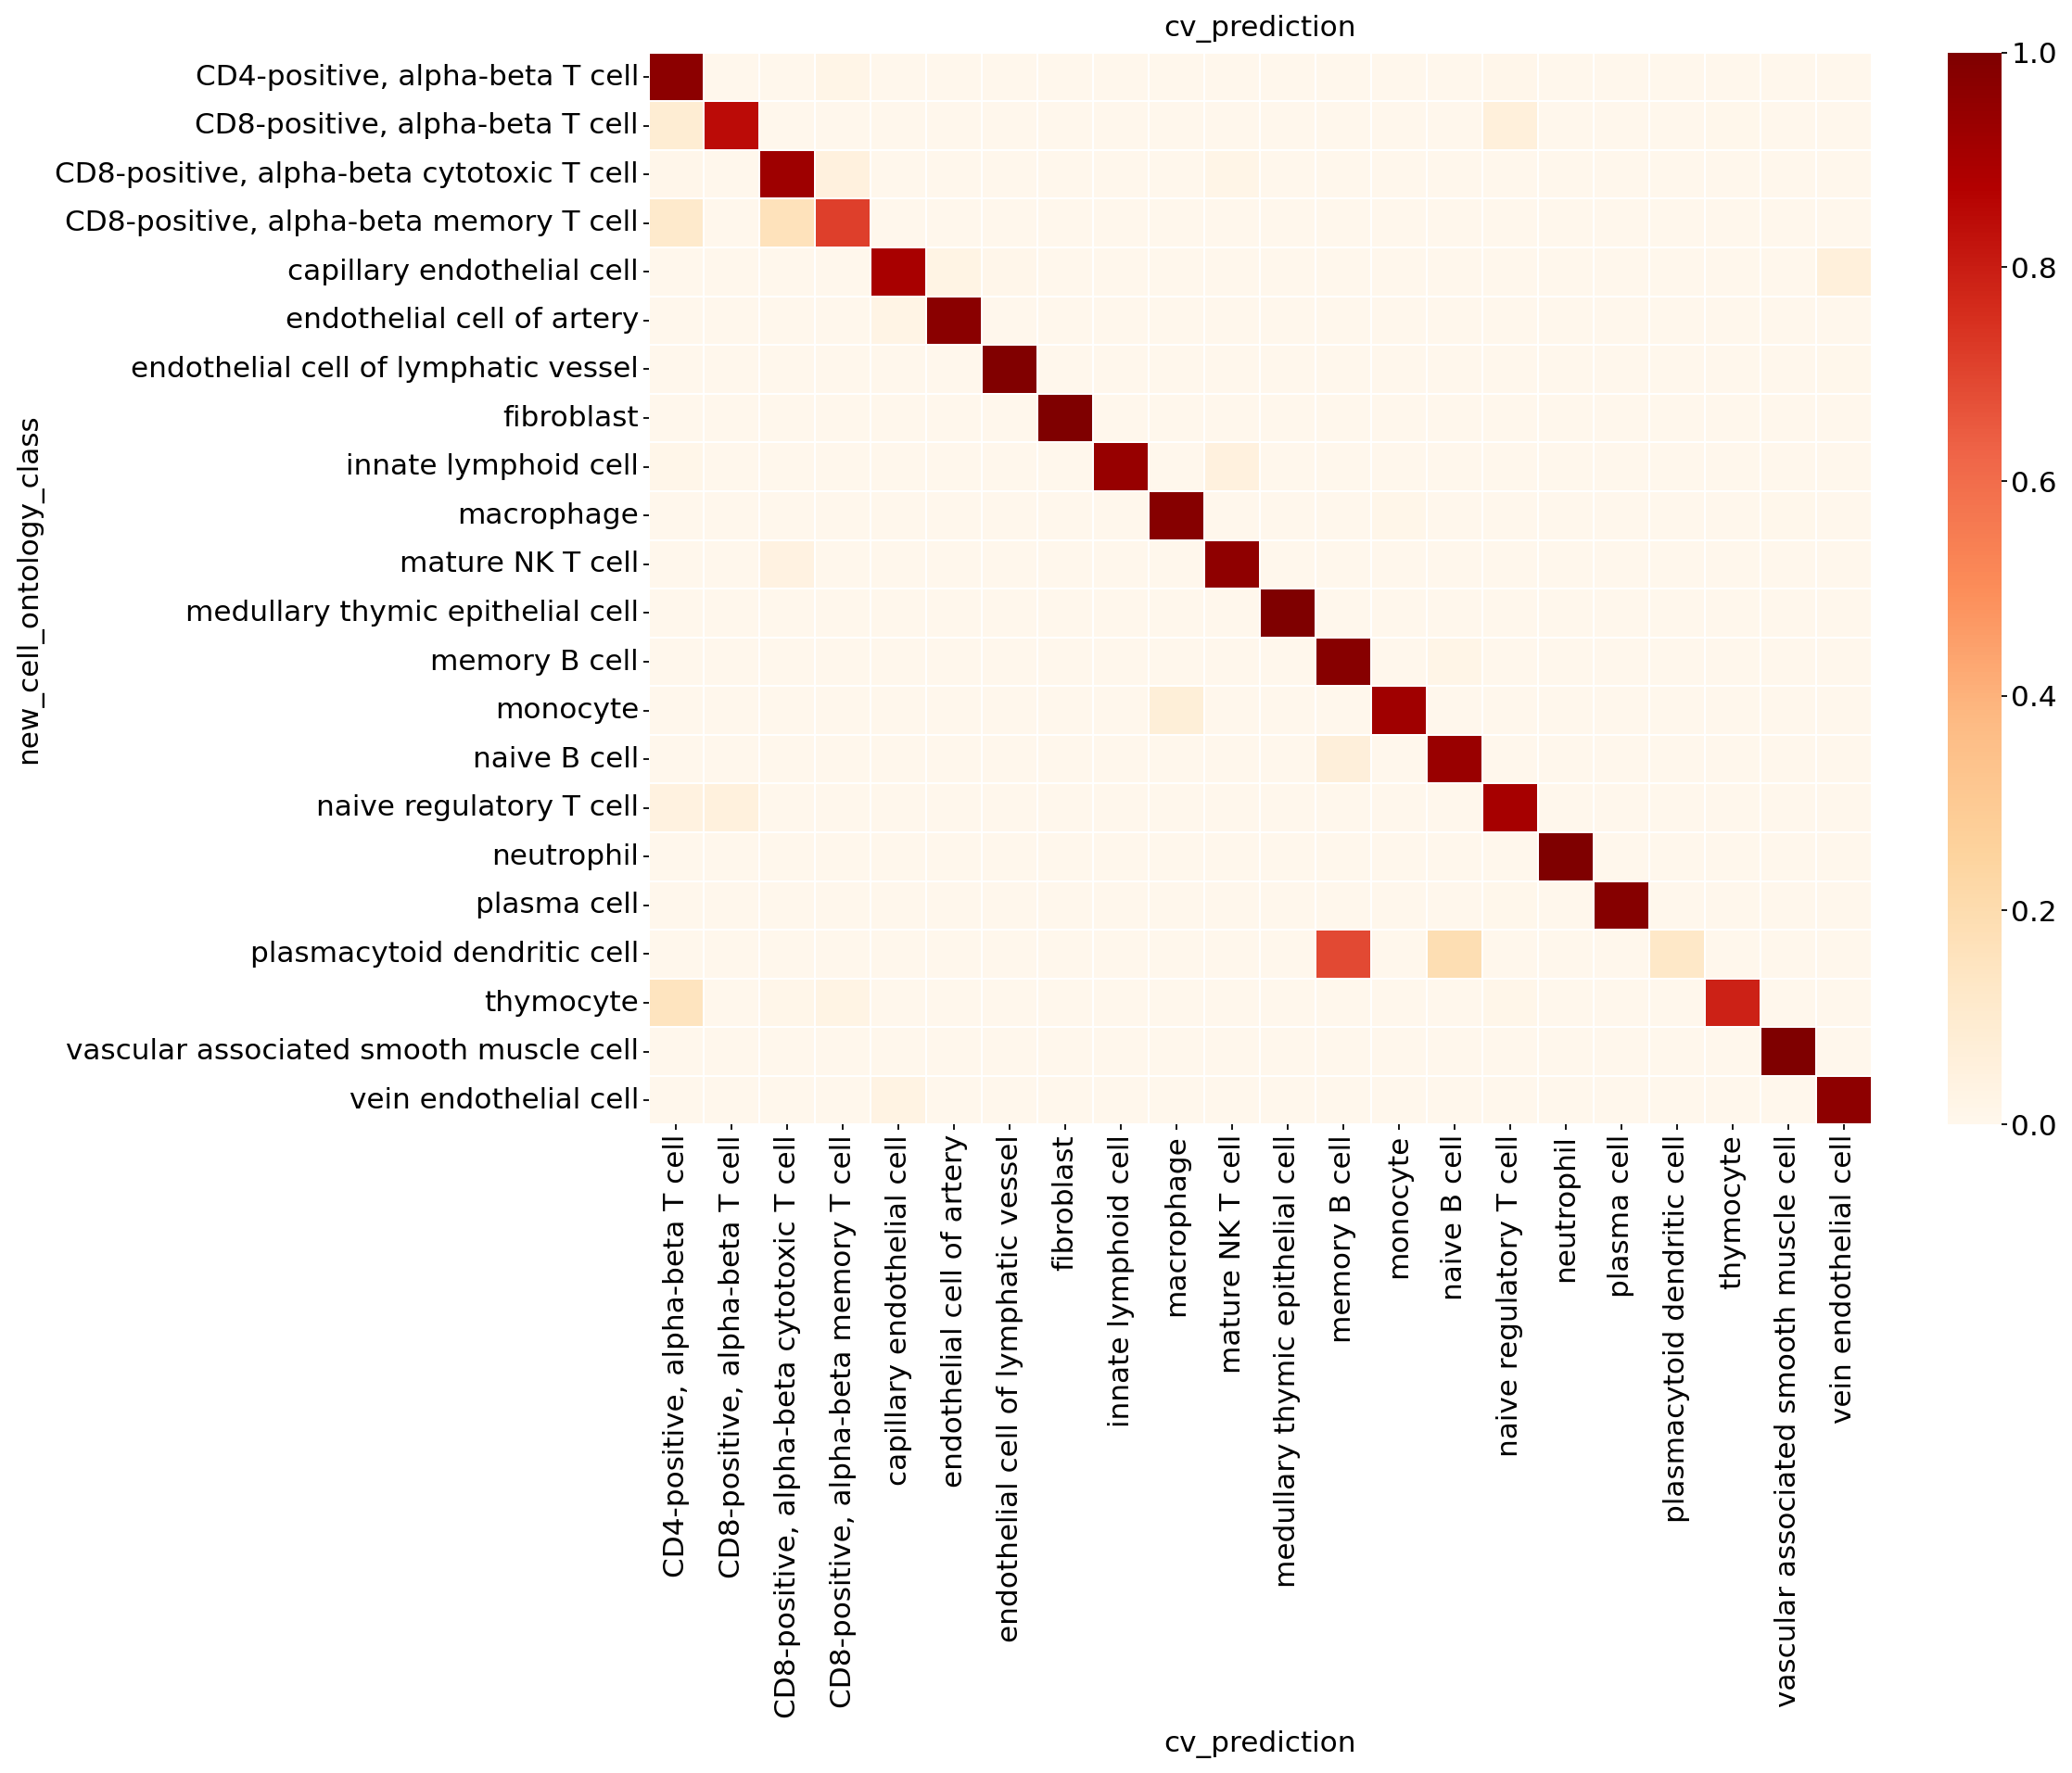

In [ ]:
popv.visualization.make_agreement_plots(thymus, prediction_keys=['cv_prediction'], popv_prediction_key='new_cell_ontology_class', save_folder='.')

In [ ]:
thymus.write('data/Thymus_cv_results.h5ad')

... storing 'cv_prediction' as categorical
... storing 'popv_celltypist_prediction' as categorical
... storing 'popv_knn_on_bbknn_prediction' as categorical
... storing 'popv_knn_on_scanorama_prediction' as categorical
... storing 'popv_knn_on_scvi_prediction' as categorical
... storing 'popv_onclass_prediction' as categorical
... storing 'popv_rf_prediction' as categorical
... storing 'popv_scanvi_prediction' as categorical
... storing 'popv_svm_prediction' as categorical
... storing 'cv_idx' as categorical


## Weight matrix

In [ ]:
from popv.reproducibility import _accuracy
import pandas as pd

In [ ]:
thymus = sc.read('data/Thymus_cv_results.h5ad')

In [ ]:
i = 0
query = anndata.read('cv_run_{}/annotated_query.h5ad'.format(i))
pred_keys = query.uns['prediction_keys']

In [ ]:
for key in pred_keys:
    _accuracy._absolute_accuracy(thymus, key, 'cell_ontology_class', save_key=key + '_abs_accuracy' )

In [ ]:
thymus

AnnData object with n_obs × n_vars = 33188 × 58559
    obs: 'tissue_in_publication', 'donor_id', 'free_annotation', 'compartment', 'cell_type_ontology_term_id', 'cell_type', 'assay', 'sex', 'tissue', 'cell_ontology_class', 'cell_ontology_class_tissue', 'donor_tissue', 'assay_correct', 'donor_assay', 'new_cell_ontology_class', 'cv_prediction', 'popv_celltypist_prediction', 'popv_knn_on_bbknn_prediction', 'popv_knn_on_scanorama_prediction', 'popv_knn_on_scvi_prediction', 'popv_onclass_prediction', 'popv_rf_prediction', 'popv_scanvi_prediction', 'popv_svm_prediction', 'cv_idx', 'popv_celltypist_prediction_abs_accuracy', 'popv_knn_on_bbknn_prediction_abs_accuracy', 'popv_knn_on_scanorama_prediction_abs_accuracy', 'popv_knn_on_scvi_prediction_abs_accuracy', 'popv_onclass_prediction_abs_accuracy', 'popv_rf_prediction_abs_accuracy', 'popv_scanvi_prediction_abs_accuracy', 'popv_svm_prediction_abs_accuracy'
    var: 'feature_type', 'ensemblid', 'highly_variable', 'means', 'dispersions', 'disper

In [ ]:
pred_acc_keys = [k + "_abs_accuracy" for k in pred_keys]

In [ ]:
weight_matrix = pd.DataFrame(index=np.unique(thymus.obs[pred_keys]))

In [ ]:
for pred_key, acc_key in zip(pred_keys, pred_acc_keys):
    weight_matrix[pred_key] = thymus.obs.groupby(pred_key).mean()[acc_key]

In [ ]:
weight_matrix.head()

,popv_celltypist_prediction,popv_knn_on_bbknn_prediction,popv_knn_on_scanorama_prediction,popv_knn_on_scvi_prediction,popv_onclass_prediction,popv_rf_prediction,popv_scanvi_prediction,popv_svm_prediction
CD38-positive naive B cell,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
"CD4-positive, CD25-positive, alpha-beta regulatory T cell",NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
"CD4-positive, alpha-beta T cell",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
"CD8-positive, alpha-beta T cell",0.000000,0.000666,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
"CD8-positive, alpha-beta cytotoxic T cell",0.305007,0.322721,0.330247,0.344882,0.319527,0.322378,0.33055,0.322857


In [ ]:
weight_matrix = weight_matrix.replace(np.nan, 0)
weight_matrix = weight_matrix.replace(0, 1/len(np.unique(thymus.obs[pred_keys])))

In [ ]:
weight_matrix.to_csv('thymus_weights.csv')

In [ ]:
thymus.obsm['X_umap'] = thymus.obsm['X_scvi_umap']

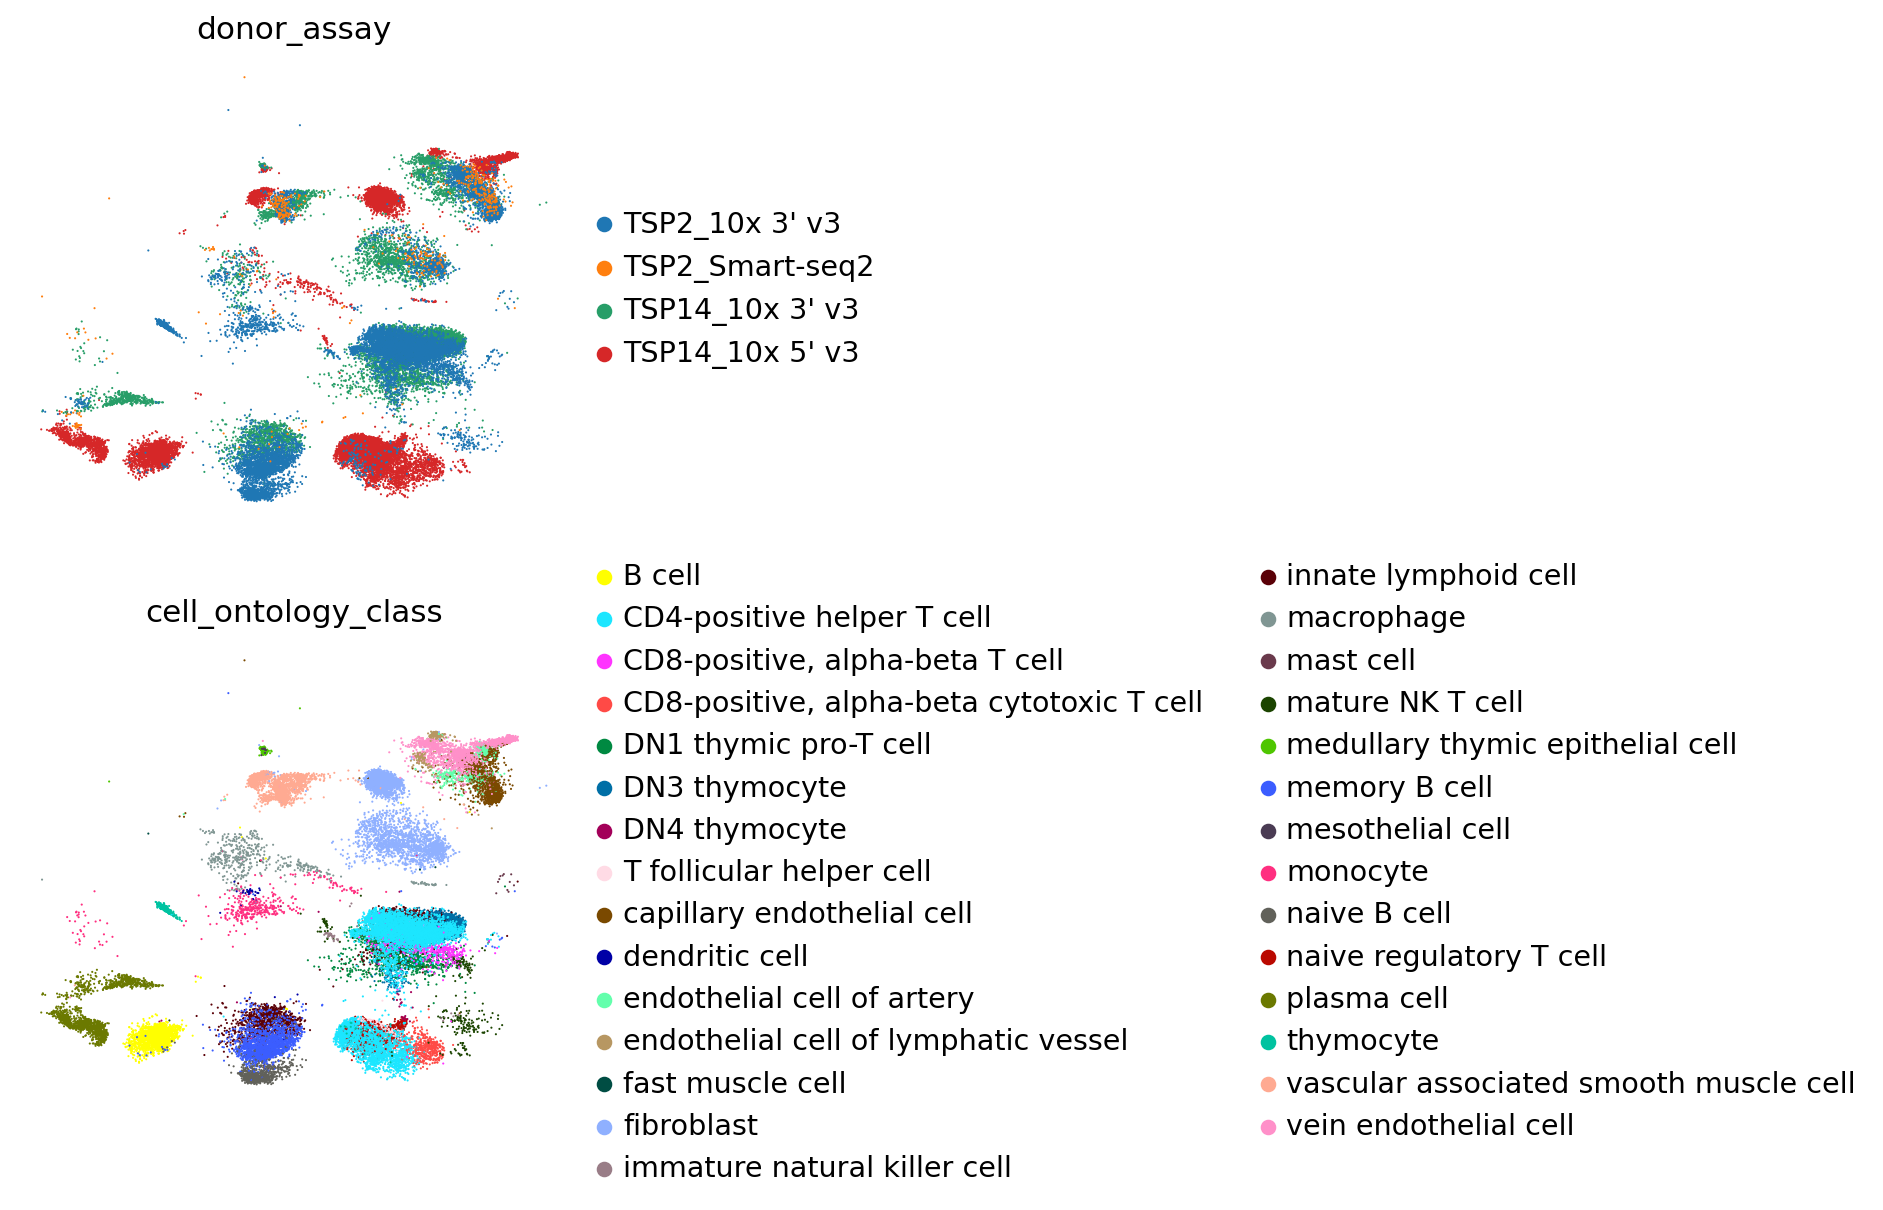

In [ ]:
sc.pl.umap(thymus, color=['donor_assay', 'cell_ontology_class'], ncols=1, frameon=False)

In [ ]:
thymus.obs['cell_ontology_class'].value_counts()

CD4-positive helper T cell                   7611
fibroblast                                   3923
innate lymphoid cell                         2589
vascular associated smooth muscle cell       2083
vein endothelial cell                        2060
B cell                                       1877
memory B cell                                1842
DN3 thymocyte                                1788
plasma cell                                  1412
capillary endothelial cell                   1332
DN1 thymic pro-T cell                         985
naive B cell                                  873
naive regulatory T cell                       761
thymocyte                                     553
endothelial cell of artery                    535
CD8-positive, alpha-beta cytotoxic T cell     501
macrophage                                    458
monocyte                                      434
T follicular helper cell                      398
CD8-positive, alpha-beta T cell               349
